In [159]:
import sys
import os
sys.path.append(sys.path[0]+'/../../')
from functions import *
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


In [160]:
os.listdir(sys.path[0]+'/../../NMRDataFits')

['Christin.npy',
 'Chicago.npy',
 'Donya.npy',
 'HunterKin2.npy',
 'Windmill.npy',
 'indicesInRange.npy',
 'Fringe.npy',
 'HunterKin3.npy',
 'FitsInRange.npy',
 'FitsInRange.txt',
 'datesInRange.npy',
 'FitsInRangeErrors.npy',
 'Fringe.txt',
 'Chicago.txt']

# Here, I bring in fits generated in the "LoadNMR" notebook

In [161]:
hunterFitsK2=np.load(sys.path[0]+'/../../NMRDataFits/Fringe.npy')

nmrDateStrings=hunterFitsK2[0].astype(int).astype(str)

nmrDates=np.empty(0)
for i in nmrDateStrings:
    nmrDates=np.append(nmrDates,datetime.strptime(i,"%Y%m%d%H%M%S"))

pcFits=hunterFitsK2[1]
usFits=hunterFitsK2[2]
dsFits=hunterFitsK2[3]

# Here, I bring in EPR calibrations generated in the "LoadEPR" notebook

In [162]:
EPR=np.load(sys.path[0]+'/../../EPRArray/FringeCals.npy',allow_pickle=True)
EPRdates=EPR[0]
EPRpc=EPR[1]
EPRds=EPR[3]

eprDateStrings=EPR[0].astype(int).astype(str)

eprDates=np.empty(0)
for i in eprDateStrings:
    eprDates=np.append(eprDates,datetime.strptime("20230"+i,"%Y%m%d%H%M"))

pcCals=EPR[1]
usCals=EPR[2]
dsCals=EPR[3]

In [163]:
len(EPRpc)

12

In [164]:
EPRds

array([1.933 , 1.9407, 1.9484, 1.9485, 1.9796, 1.9183, 1.8981, 1.9047,
       1.8015, 1.8967, 1.9269, 1.9302])

# Organizing NMRs 

(0.0, 60.0)

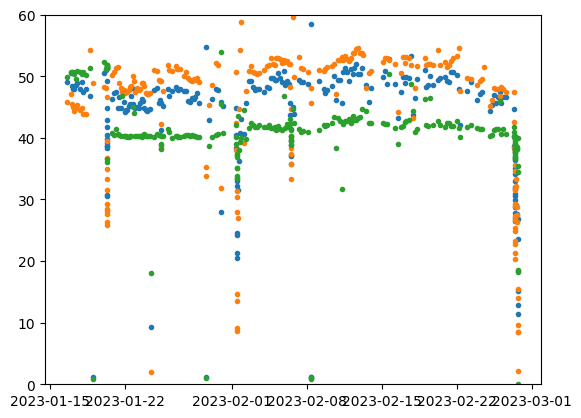

In [165]:
Hdate2=hunterFitsK2[0].astype(int).astype(str)

Hdate2_objects=[datetime.strptime(date,"%Y%m%d%H%M%S") for date in Hdate2]
Hdate2_array=np.array(Hdate2_objects)
Hsorted_dates2=np.sort(Hdate2_array)
Hindex_array2=[Hdate2_objects.index(date) for date in Hsorted_dates2]

len(Hsorted_dates2)
H2=hunterFitsK2[3][Hindex_array2]
H2pc=hunterFitsK2[1][Hindex_array2]
H2us=hunterFitsK2[2][Hindex_array2]

checkerH2=np.where(H2pc<12)
Hsorted_dates2=Hsorted_dates2[checkerH2][15:-1]
H2=H2[checkerH2][15:-1]
H2pc=H2pc[checkerH2][15:-1]
H2us=H2us[checkerH2][15:-1]


Hsorted_dates2=Hsorted_dates2[np.where(H2!=0)]
H2us=H2us[np.where(H2!=0)]
H2=H2[np.where(H2!=0)]
H2pc=H2pc[np.where(H2pc!=0)]



Hsorted_dates2=Hsorted_dates2[np.where(H2<33)]
H2pc=H2pc[np.where(H2<33)]
H2us=H2us[np.where(H2<33)]
H2=H2[np.where(H2<33)]



plt.plot(Hsorted_dates2,(np.mean(dsCals)*H2+.73*H2us)/2,'.',label='Before Correction')
plt.plot(Hsorted_dates2,5.5*H2pc,'.',label='Before Correction')
plt.plot(Hsorted_dates2,.73*H2us,'.',label='Before Correction')

plt.ylim(0,60)
#plt.plot(Hsorted_dates2,H2pc)
#plt.ylim((40,70))
#plt.plot(Hsorted_dates2[:-10],CorrectedNMRs[:-10],'.', label="After Correction")
#plt.legend(loc='upper left')
#plt.plot(ratDate,newCorrectedNMRs,'.')


In [166]:
len(EPRdates)
eprdat=np.zeros(12)+.02


/tmp/ipykernel_6531/2094151100.py:2: RuntimeWarning: divide by zero encountered in divide
  ratUS=H2pc/H2us


Text(0.5, 1.0, 'Fringe NMR Ratios and EPR dates')

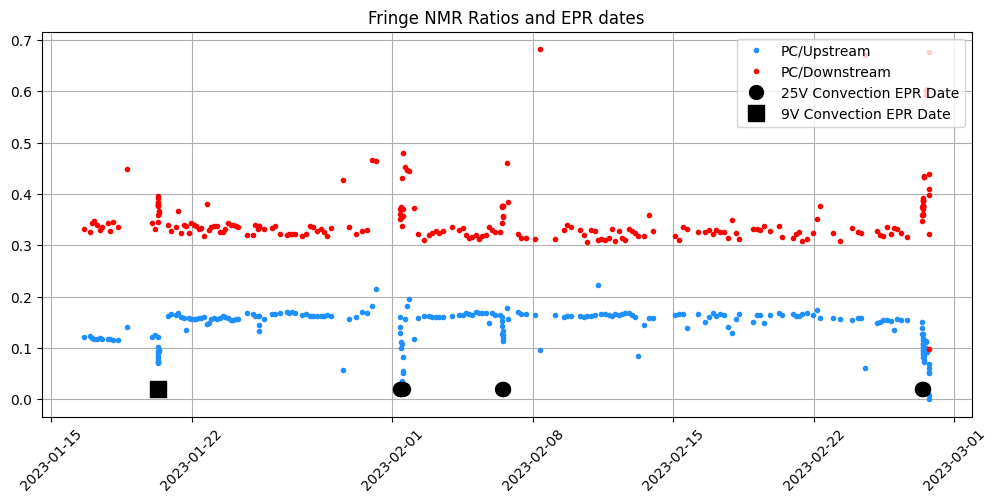

In [167]:

ratAvg=(H2us+H2)/H2pc*.5
ratUS=H2pc/H2us
ratDS=H2pc/H2

newDS=H2[np.where(ratDS<.8)]
ratDate=Hsorted_dates2[np.where(ratDS<.8)]
ratUS=ratUS[np.where(ratDS<.8)]
ratAvg=ratAvg[np.where(ratDS<.8)]
ratDS=ratDS[np.where(ratDS<.8)]
ratUS[-4]=0

plt.figure(figsize=(12,5))
plt.plot(ratDate,ratUS,'.',label='PC/Upstream',color='dodgerblue')
plt.plot(ratDate,ratDS,'.',label='PC/Downstream',color='red')
#plt.plot(ratDate,(ratUS+ratDS)/2,'.')
plt.plot(eprDates,eprdat,'.',markersize=20,label = '25V Convection EPR Date',color='black')
plt.plot(datetime(2023,1,20,8),0.02,'s',markersize=12,label='9V Convection EPR Date',color='black')
#plt.ylim(0,.9)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Fringe NMR Ratios and EPR dates')

In [168]:
print(np.std(ratDS)/np.mean(ratDS)*100)
print(np.std(ratUS)/np.mean(ratUS)*100)
print(np.std(ratUS+ratDS)/np.mean(ratUS+ratDS)*100)

18.10895150598236
25.36846325285753
12.218996332696557


In [169]:
print(np.std(ratDS))
print(np.std(ratUS))

0.06402464343490179
0.035726150676608406


Text(0, 0.5, 'Counts')

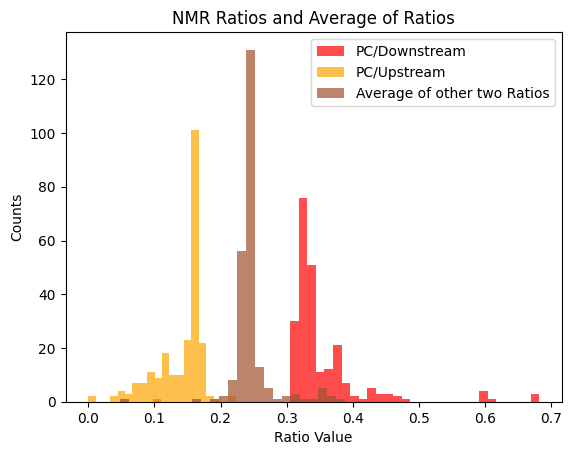

In [170]:
plt.hist(ratDS,bins=45,alpha=.7,color='red',label='PC/Downstream')
plt.hist(ratUS,bins=20,alpha=.7,color='orange',label='PC/Upstream')
plt.hist((ratUS+ratDS)/2,bins=25,alpha=.7,color='sienna',label='Average of other two Ratios')
#plt.hist(1/ratAvg,alpha=.7,bins=25)
plt.title("NMR Ratios and Average of Ratios")
plt.legend(loc='upper right')
plt.xlabel('Ratio Value')
plt.ylabel('Counts')

#  Weighted averaging adjusting ratios to be on average the same

In [171]:
tempH2=H2
tempH2us=H2us
tempH2pc=H2pc
tempDate=Hsorted_dates2
remove=np.where(tempH2<10)
remove=np.append(remove,np.where(tempH2us<40))
remove=np.append(remove,np.where(tempH2us>80))
remove=np.unique(remove)

tempH2=np.delete(tempH2,remove)
tempH2us=np.delete(tempH2us,remove)
tempH2pc=np.delete(tempH2pc,remove)
tempDate=np.delete(tempDate,remove)



wDS=tempH2/np.mean(tempH2)
wUS=tempH2us/np.mean(tempH2us)
wPC=tempH2pc/np.mean(tempH2pc)


weightedR_DS=wPC/wDS
weightedR_US=wPC/wUS


In [172]:
np.mean(wUS)

0.9999999999999999

Text(0.5, 1.0, 'Fringe NMR Ratios and EPR dates')

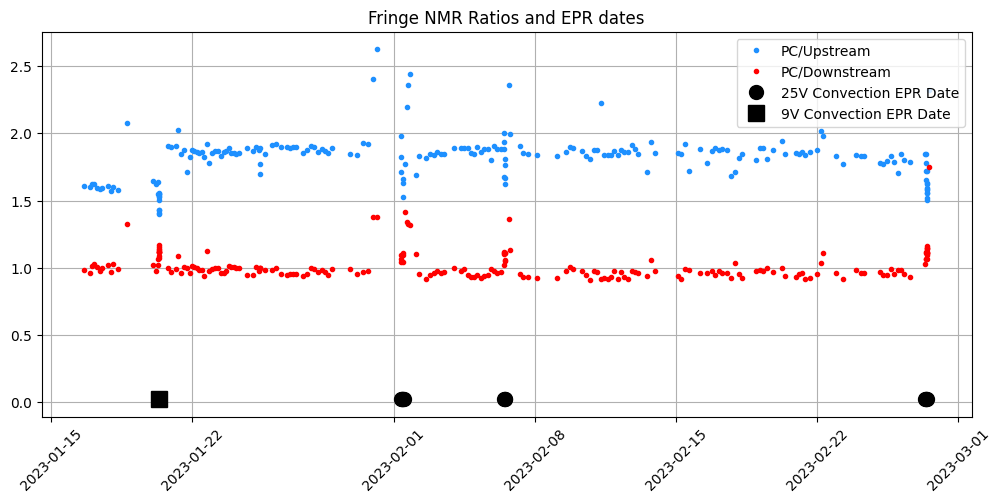

In [173]:
plt.figure(figsize=(12,5))
plt.plot(tempDate,weightedR_US-.2+weightedR_DS,'.',label='PC/Upstream',color='dodgerblue')
plt.plot(tempDate,weightedR_DS,'.',label='PC/Downstream',color='red')
#plt.plot(tempDate,(weightedR_US+weightedR_DS)/2,'.')
plt.plot(eprDates,eprdat,'.',markersize=20,label = '25V Convection EPR Date',color='black')
plt.plot(datetime(2023,1,20,8),0.02,'s',markersize=12,label='9V Convection EPR Date',color='black')
#plt.ylim(0,2)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='upper right')
plt.title('Fringe NMR Ratios and EPR dates')

Text(0, 0.5, 'Count')

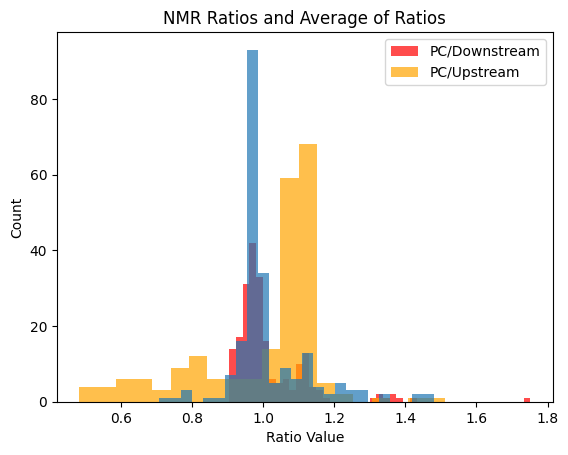

In [174]:
ratAvg=(1/weightedR_DS+1/weightedR_US)/2
plt.hist(weightedR_DS,bins=45,alpha=.7,color='red',label='PC/Downstream')
plt.hist(weightedR_US,bins=20,alpha=.7,color='orange',label='PC/Upstream')
#plt.hist((1/ratUS+1/ratDS)/2,bins=25,alpha=.7,range=(0,10),color='sienna',label='Average of other two Ratios')
plt.hist(ratAvg,alpha=.7,bins=25)
plt.title("NMR Ratios and Average of Ratios")
plt.legend(loc='upper right')
plt.xlabel('Ratio Value')
plt.ylabel('Count')

/tmp/ipykernel_6531/2149859189.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(Hsorted_dates2,H2/H2us,'.')


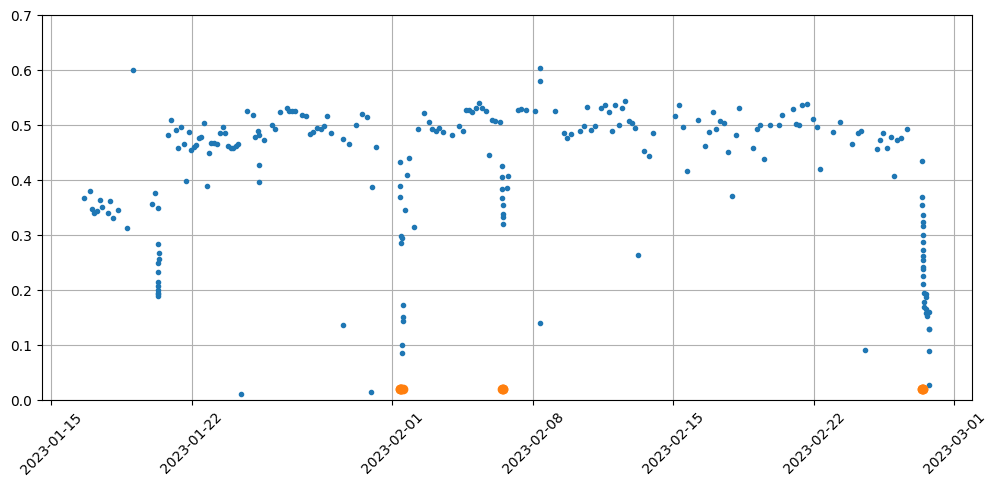

In [175]:
plt.figure(figsize=(12,5))
plt.plot(Hsorted_dates2,H2/H2us,'.')

plt.plot(eprDates,eprdat,'.',markersize=12)
plt.ylim(0,.7)
plt.xticks(rotation=45)
plt.grid(True)

In [176]:
np.mean(np.mean(dsCals)*H2)

44.674726372137364

In [177]:
np.mean(pcCals)

4.400541666666666

(array([2., 0., 0., 0., 1., 0., 0., 0., 0., 9.]),
 array([0.9776 , 1.42441, 1.87122, 2.31803, 2.76484, 3.21165, 3.65846,
        4.10527, 4.55208, 4.99889, 5.4457 ]),
 <BarContainer object of 10 artists>)

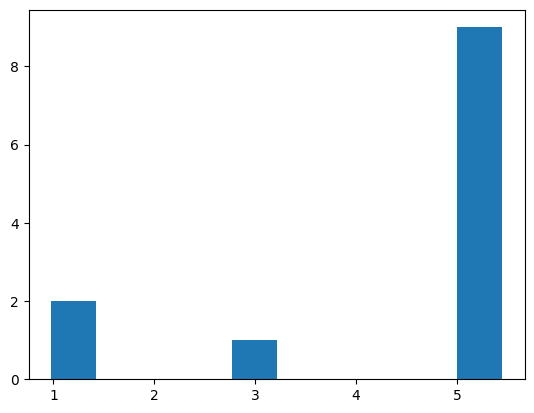

In [178]:
plt.hist(pcCals)

In [179]:
np.where(H2pc==0)

(array([], dtype=int64),)

In [180]:
len(H2)

240

In [181]:
sweepRatios=H2pc/H2

# Here I bring in EPR NMR before and after sweeps

In [182]:
EPRdates

array([2010843., 2010924., 2010954., 2011042., 2011216., 2061128.,
       2061148., 2061219., 2270844., 2270910., 2270954., 2271040.])

In [183]:
myFits=np.transpose(hunterFitsK2)
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin2FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))


dateList=np.empty(0)
RatioB=np.empty(0)
RatioA=np.empty(0)

for i in range(0,len(HunterKin2FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin2FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin2FitsOrdered[0][i]))[8:])
for i in range(0,len(EPRdates)):
    b,a=FindNMRsB4andAft('20230'+str(int(EPRdates[i])),dateList)
    print('20230'+str(int(EPRdates[i])),i)
    print(HunterKin2FitsOrdered[0][b],' ',HunterKin2FitsOrdered[0][a])
    RatioB=np.append(RatioB,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioA=np.append(RatioA,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    
 

 
EPRdates=EPRdates[np.where(RatioB<1)]
EPRpc=EPRpc[np.where(RatioB<1)]
EPRds=EPRds[np.where(RatioB<1)]
RatioB=RatioB[np.where(RatioB<1)]

202302010843 0
20230201084234.0   20230201084431.0
202302010924 1
20230201092413.0   20230201092557.0
202302010954 2
20230201095412.0   20230201095557.0
202302011042 3
20230201104141.0   20230201104415.0
202302011216 4
20230201121558.0   20230201121811.0
202302061128 5
20230206112738.0   20230206112928.0
202302061148 6
20230206114748.0   20230206115014.0
202302061219 7
20230206121907.0   20230206122120.0
202302270844 8
20230227084349.0   20230227084600.0
202302270910 9
20230227090927.0   20230227091141.0
202302270954 10
20230227095356.0   20230227095619.0
202302271040 11
20230227103941.0   20230227104206.0


In [184]:
RatioB

array([0.3610138 , 0.37466612, 0.3699467 , 0.37569614, 0.3759654 ,
       0.37635025, 0.34733847, 0.37445972, 0.37815029, 0.37601589])

(array([1., 0., 0., 0., 1., 0., 0., 1., 2., 5.]),
 array([0.34733847, 0.35041965, 0.35350083, 0.35658201, 0.3596632 ,
        0.36274438, 0.36582556, 0.36890674, 0.37198792, 0.3750691 ,
        0.37815029]),
 <BarContainer object of 10 artists>)

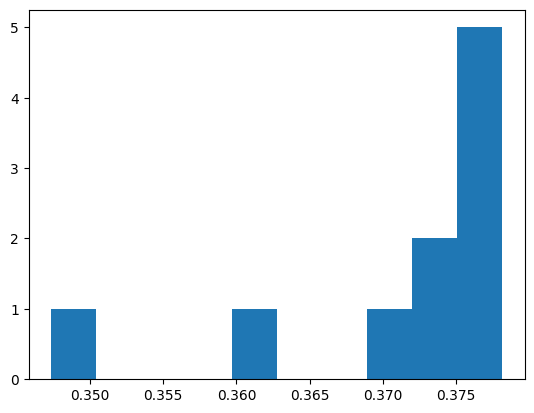

In [185]:
plt.hist(RatioB)

In [186]:
RatioA

array([0.35135394, 1.93531124, 1.98116649, 0.35344059, 0.35712316,
       0.34415187, 0.35598315, 0.35653086, 1.5337008 , 0.35881598,
       0.3606819 , 0.35967991])

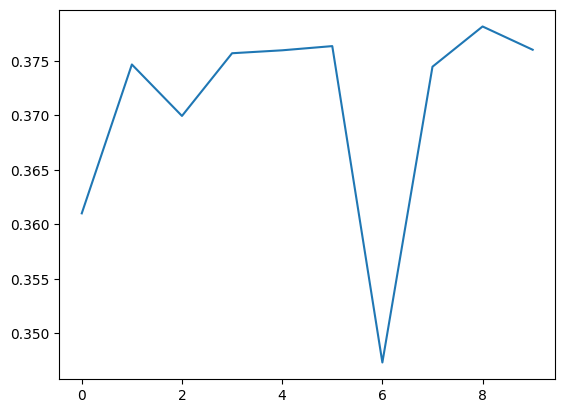

In [187]:
plt.plot(RatioB)

# EPR Density Corrections

In [188]:
RatioB

array([0.3610138 , 0.37466612, 0.3699467 , 0.37569614, 0.3759654 ,
       0.37635025, 0.34733847, 0.37445972, 0.37815029, 0.37601589])

This better be 1.0 -->  1.0
1.8291668754849246   2.290394398761698


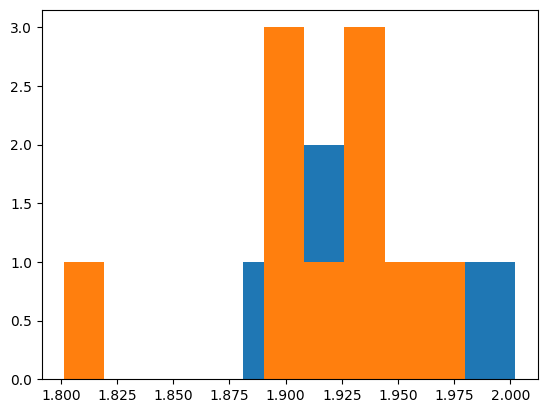

In [189]:
C2=458.84 #V_PC
C3=40.21 #V_TT
C4=201.2 #V_TC
C6=878.7170 #kHz/Gauss

C7=4.8376 #cbar/(kHz/G)
F2=7.953 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.34733847 #ref_ratio
F5=.37815029

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(RatioB)):
    N=np.append(N,(F5/RatioB[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(RatioB)):
    R=np.append(R,1/((F5/RatioB[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(RatioB)):
    S=np.append(S,(F5/RatioB[i])/((F5/RatioB[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(RatioB)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(RatioB)):
    U=np.append(U,S[i]*I3)

adjDS=EPRds*S
adjDS=adjDS[np.where(adjDS!=0)]
adjPC=EPRpc*R
adjPC=adjPC[np.where(adjPC!=0)]
dsBaseLine=EPRds[np.where(EPRds!=0)]
FinalEPRds=np.mean(adjDS)
FinalEPRdsE=np.std(adjDS)


dsNewHist=plt.hist(adjDS)
dsHist=plt.hist(dsBaseLine)
print(100*np.std(adjDS)/np.mean(adjDS),' ',100*np.std(dsBaseLine)/np.mean(adjDS))

In [190]:
len(adjDS)

10

In [191]:
#adjDS=adjDS[np.where(adjDS<2)]

In [192]:
len(adjDS)

10

In [193]:
EPRdates[0]

2010843.0

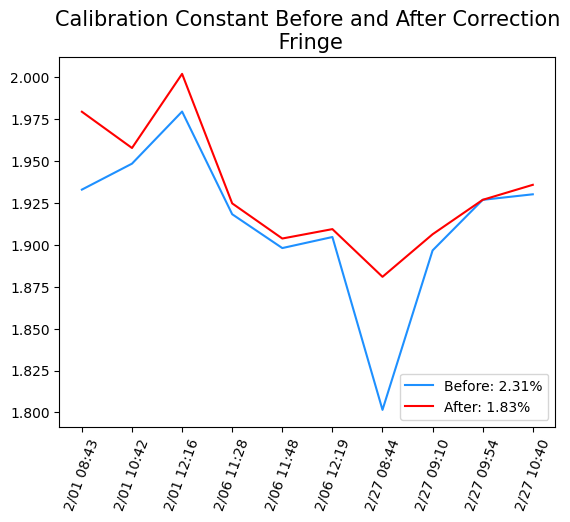

In [194]:
EPRdatetime=np.empty(0)
dateString=np.empty(0)

oldPerc=str(np.round(np.std(EPRds)/np.mean(EPRds)*100,2))
newPerc=str(np.round(np.std(adjDS)/np.mean(adjDS)*100,2))

for i in range(0,len(EPRdates)):
    EPRdatetime=np.append(EPRdatetime,datetime.strptime('20230'+str(int(EPRdates[i])),'%Y%m%d%H%M'))
    
    dateString=np.append(dateString,str(EPRdates[i])[0]+'/'+str(EPRdates[i])[1:3]+' '+str(EPRdates[i])[3:5]+':'+str(EPRdates[i])[5:7])

plt.plot(dateString,EPRds,label='Before: '+oldPerc+'%',color='dodgerblue')
plt.plot(dateString,adjDS,label='After: '+newPerc+'%',color='red')
plt.legend(loc='lower right')
x=plt.xticks(rotation=70)



#np.std(adjDS)/np.mean(adjDS)*100
plt.title("Calibration Constant Before and After Correction"+'\n Fringe',fontsize=15)
plt.savefig('CalCorrectionFringe.png')

In [195]:
FinalEPRds=np.mean(adjDS)

In [196]:
FinalEPRds

1.9327481705070757

In [197]:
np.mean(EPRds)

1.9137499999999998

In [198]:
#addin november 12

## add on to use alpha and beta to correct NMRs


C2=458.84 #V_PC
C3=40.21 #V_TT
C4=201.2 #V_TC
C6=878.7170 #kHz/Gauss

C7=4.8376 #cbar/(kHz/G)
F2=7.953 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.34733847 #ref_ratio
F5=.37815029

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(sweepRatios)):
    N=np.append(N,(F5/sweepRatios[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(sweepRatios)):
    R=np.append(R,1/((F5/sweepRatios[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(sweepRatios)):
    S=np.append(S,(F5/sweepRatios[i])/((F5/sweepRatios[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(sweepRatios)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(sweepRatios)):
    U=np.append(U,S[i]*I3)
    
newEPRs=FinalEPRds/S


This better be 1.0 -->  1.0


# Take the Density Corrected EPR Calibration and apply it to all NMRs

In [199]:
CorrectedRatio=F5

newEPRds=np.empty(0)
CorrectedNMRs=np.empty(0)
for i,j in enumerate(H2):
#    CorrectedNMRs=np.append(CorrectedNMRs,j*FinalEPRds*CorrectedRatio/sweepRatios[i])
#    CorrectedNMRs=np.append(CorrectedNMRs,j*FinalEPRds*sweepRatios[i]/CorrectedRatio)
    CorrectedNMRs=np.append(CorrectedNMRs,j*newEPRs[i])

    newEPRds=np.append(newEPRds,FinalEPRds*CorrectedRatio/sweepRatios[i])

In [200]:
len(newEPRds)
len(H2)

240

(array([ 3.,  0.,  5.,  0.,  0.,  4.,  9.,  2.,  8., 27.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

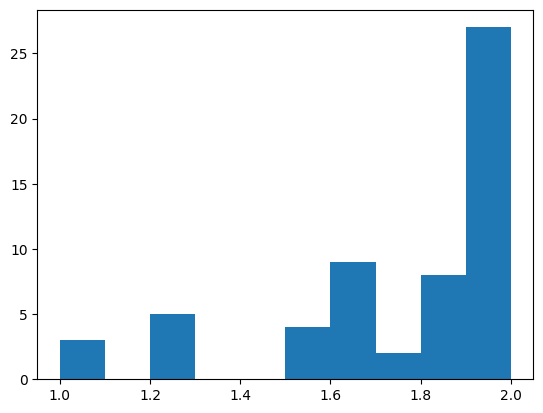

In [201]:
plt.hist(newEPRds,range=(1,2))

In [202]:
pctemp=np.load("pctemp.npy")
tctemp=np.load("tctemp.npy")

In [203]:
r=pctemp[10]/tctemp[10]
r

8.460902659451463

In [204]:
scale=r*tctemp/pctemp
scale=1

Text(0, 0.5, 'Counts')

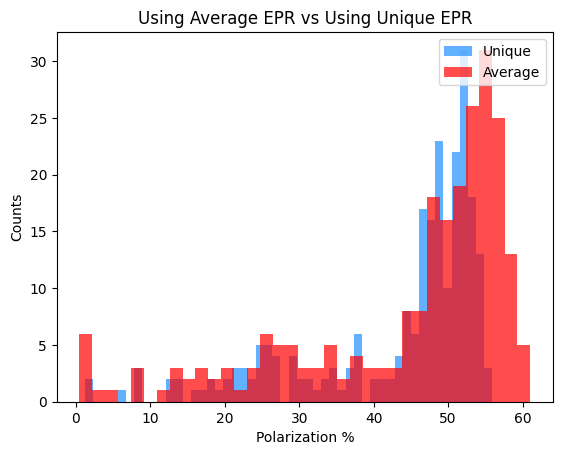

In [205]:
d=plt.hist(CorrectedNMRs*scale,bins=50,alpha=.7,color='dodgerblue',label="Unique")
k=plt.hist(H2*np.mean(EPRds),bins=35,alpha=.7,color='red',label="Average")
plt.title("Using Average EPR vs Using Unique EPR")
plt.legend(loc='upper right')
plt.xlabel("Polarization %")
plt.ylabel("Counts")

# Density Corrections using average of PC/US and PC/DS

In [206]:
EPR=np.load(sys.path[0]+'/../../EPRArray/FringeCals.npy',allow_pickle=True)
EPRdates=EPR[0]
EPRpc=EPR[1]
EPRds=EPR[3]

eprDateStrings=EPR[0].astype(int).astype(str)

eprDates=np.empty(0)
for i in eprDateStrings:
    eprDates=np.append(eprDates,datetime.strptime("20230"+i,"%Y%m%d%H%M"))

pcCals=EPR[1]
usCals=EPR[2]
dsCals=EPR[3]

myFits=np.transpose(hunterFitsK2)
dates=myFits[:,0].astype(int).astype(str)
date_objects = [datetime.strptime(date, "%Y%m%d%H%M%S") for date in dates]
dates_array = np.array(date_objects)
sorted_dates = np.sort(dates_array)
index_array = [date_objects.index(date) for date in sorted_dates]
HunterKin2FitsOrdered = np.transpose(np.take(myFits, index_array, axis=0))


dateList=np.empty(0)
RatioBDS=np.empty(0)
RatioADS=np.empty(0)
RatioBUS=np.empty(0)
RatioAUS=np.empty(0)


for i in range(0,len(HunterKin2FitsOrdered[0])):
    dateList=np.append(dateList,str(int(HunterKin2FitsOrdered[0][i]))[:8]+'_'+str(int(HunterKin2FitsOrdered[0][i]))[8:])
for i in range(0,len(EPRdates)):
    b,a=FindNMRsB4andAft('20230'+str(int(EPRdates[i])),dateList)
    print('20230'+str(int(EPRdates[i])),i)
    print(HunterKin2FitsOrdered[0][b],' ',HunterKin2FitsOrdered[0][a])
    RatioBDS=np.append(RatioBDS,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioBUS=np.append(RatioBUS,HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[2][b])

    #print(HunterKin2FitsOrdered[1][b]/HunterKin2FitsOrdered[3][b])
    RatioADS=np.append(RatioADS,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    RatioAUS=np.append(RatioAUS,HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[2][a])

    #print(HunterKin2FitsOrdered[1][a]/HunterKin2FitsOrdered[3][a])
    
 

 
EPRdates=EPRdates[np.where(RatioBDS<1)]
EPRpc=EPRpc[np.where(RatioBDS<1)]
EPRds=EPRds[np.where(RatioBDS<1)]
RatioBUS=RatioBUS[np.where(RatioBDS<1)]
RatioBDS=RatioBDS[np.where(RatioBDS<1)]

202302010843 0
20230201084234.0   20230201084431.0
202302010924 1
20230201092413.0   20230201092557.0
202302010954 2
20230201095412.0   20230201095557.0
202302011042 3
20230201104141.0   20230201104415.0
202302011216 4
20230201121558.0   20230201121811.0
202302061128 5
20230206112738.0   20230206112928.0
202302061148 6
20230206114748.0   20230206115014.0
202302061219 7
20230206121907.0   20230206122120.0
202302270844 8
20230227084349.0   20230227084600.0
202302270910 9
20230227090927.0   20230227091141.0
202302270954 10
20230227095356.0   20230227095619.0
202302271040 11
20230227103941.0   20230227104206.0


In [207]:
RatioBDS

array([0.3610138 , 0.37466612, 0.3699467 , 0.37569614, 0.3759654 ,
       0.37635025, 0.34733847, 0.37445972, 0.37815029, 0.37601589])

In [208]:
RatioBUS

array([0.14060785, 0.1113645 , 0.05552581, 0.14367988, 0.13284504,
       0.12536166, 0.15066055, 0.13820705, 0.12703791, 0.11871936])

(array([1., 0., 0., 0., 0., 0., 1., 2., 4., 2.]),
 array([0.42547251, 0.43486287, 0.44425322, 0.45364357, 0.46303392,
        0.47242427, 0.48181462, 0.49120497, 0.50059532, 0.50998567,
        0.51937602]),
 <BarContainer object of 10 artists>)

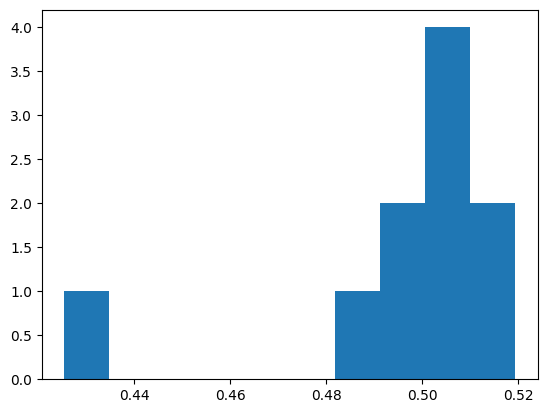

In [209]:
plt.hist(RatioBUS+RatioBDS)

In [210]:
RatioBA=(RatioBDS+RatioBUS)/2

In [211]:
RatioBA

array([0.25081083, 0.24301531, 0.21273626, 0.25968801, 0.25440522,
       0.25085596, 0.24899951, 0.25633338, 0.2525941 , 0.24736763])

In [212]:
C2=458.84 #V_PC
C3=40.21 #V_TT
C4=201.2 #V_TC
C6=878.7170 #kHz/Gauss

C7=4.8376 #cbar/(kHz/G)
F2=7.953 #Fill Density
F3=265 #ref. T_pc
F4=31.5 #ref. T_tc
F5=.24899951 #ref_ratio
#F5=.37815029

I2=C2*(F4+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_pc
I3=(C4+C3)*(F3+273.15)/(C2*(F4+273.15)+(C4+C3)*(F3+273.15)) #f_tc
print('This better be 1.0 --> ',I2+I3)

#T_pc
N=np.empty(0)
O=np.empty(0)
for i in range(0,len(RatioBA)):
    N=np.append(N,(F5/RatioBA[i])*F3)
    O=np.append(O,F4)

#alpha
R=np.empty(0)
for i in range(0,len(RatioBA)):
    R=np.append(R,1/((F5/RatioBA[i])*(1-I2)+I2))

#beta
S=np.empty(0)
for i in range(0,len(RatioBA)):
    S=np.append(S,(F5/RatioBA[i])/((F5/RatioBA[i])*I3+1-I3))

#f_pc
T=np.empty(0)
for i in range(0,len(RatioBA)):
    T=np.append(T,R[i]*I2)

#f_tc
U=np.empty(0)
for i in range(0,len(RatioBA)):
    U=np.append(U,S[i]*I3)

adjDS=EPRds*S
adjDS=adjDS[np.where(adjDS!=0)]
adjPC=EPRpc*R
adjPC=adjPC[np.where(adjPC!=0)]
dsBaseLine=EPRds[np.where(EPRds!=0)]
FinalEPRds=np.mean(adjDS)
FinalEPRdsE=np.std(adjDS)


This better be 1.0 -->  1.0


In [213]:
np.mean(np.delete(EPRds,2))

1.9064333333333332

In [214]:
np.mean(np.delete(adjDS,2))

1.8965293090967152

4.450609031198056   2.3044028631263083


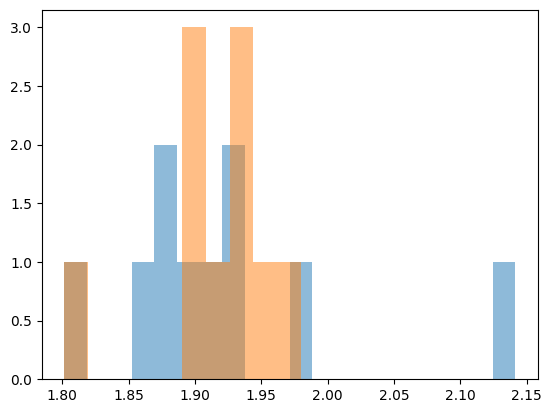

In [215]:
dsNewHist=plt.hist(adjDS,alpha=.5,bins=20)
dsHist=plt.hist(dsBaseLine,alpha=.5,bins=10)
print(100*np.std(adjDS)/np.mean(adjDS),' ',100*np.std(dsBaseLine)/np.mean(adjDS))

In [216]:
len(sweepRatios)

240

In [217]:
len(H2)

240

In [218]:
#CorrectedRatio=F5
#sweepRatios=(ratDS+ratUS)/2
#newEPRds=np.empty(0)
#newCorrectedNMRs=np.empty(0)
#for i,j in enumerate(newDS):
#    newCorrectedNMRs=np.append(newCorrectedNMRs,j*FinalEPRds*sweepRatios[i]/CorrectedRatio)
#    newEPRds=np.append(newEPRds,FinalEPRds*CorrectedRatio/sweepRatios[i])

In [219]:
#plt.plot(newCorrectedNMRs)

In [220]:
sweepRatios

array([ 0.3318661 ,  0.32547204,  0.34312318,  0.34733559,  0.33957748,
        0.32984527,  0.33623822,  0.34384277,  0.32728841,  0.34627694,
        0.33511455,  0.44929339, 11.94776983,  0.34392713,  0.33078281,
        0.34601621,  0.35952223,  0.37862052,  0.38474501,  0.39137937,
        0.39648947,  0.37766151,  0.3820532 ,  0.37659562,  0.37844321,
        0.36326866,  0.36721697,  0.33859685,  0.32744455,  0.33468198,
        0.36711606,  0.32391421,  0.33977398,  0.33830369,  0.32394856,
        0.34349083,  0.33998066,  0.33755652,  0.33185301,  0.33291788,
        0.31723279,  0.37951703,  0.33050493,  0.3353356 ,  0.33757246,
        0.3381439 ,  0.32584138,  0.32560585,  0.3308189 ,  0.3435581 ,
        0.33909298,  0.33929933,  0.33673121,  0.33626759,  1.46210239,
        0.3209328 ,  0.32032811,  0.3392469 ,  0.33091392,  0.33637187,
        0.33712203,  0.33685585,  0.33193186,  0.33288512,  0.33703921,
        0.32213595,  0.32025068,  0.3215893 ,  0.32238155,  0.32

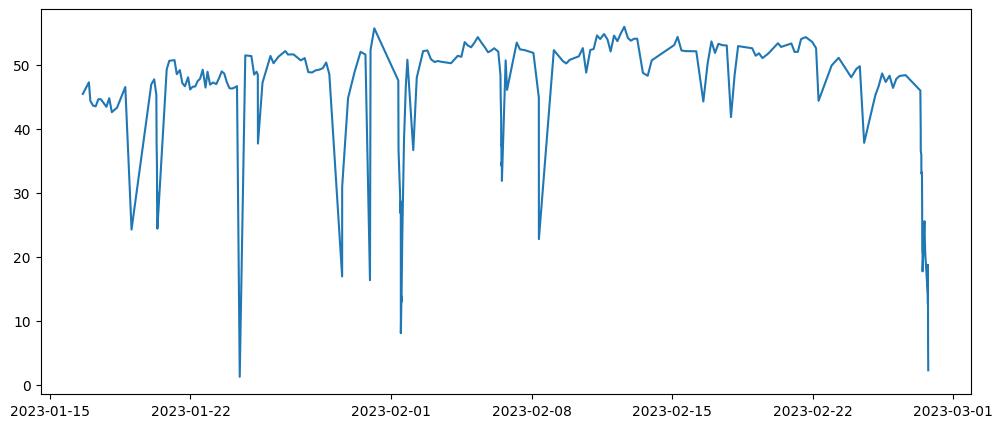

In [221]:
plt.figure(figsize=(12,5))
#plt.plot(ratDate,newCorrectedNMRs,)
plt.plot(Hsorted_dates2,CorrectedNMRs,)
#plt.plot(Hsorted_dates2,H2*np.mean(EPRds),)
#plt.plot(Hsorted_dates2,H2pc*np.mean(EPRpc),)



#plt.ylim(40,80)

# USED IN TEMP STUDY

In [222]:
i=np.where(CorrectedNMRs>60)

In [223]:
Hsorted_dates2[i]

array([], dtype=object)

(array([ 0.,  4.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  2.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         3.,  3.,  2.,  5.,  0.,  1.,  1.,  4.,  5., 18.,  7.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  ]),
 <BarContainer object of 50 artists>)

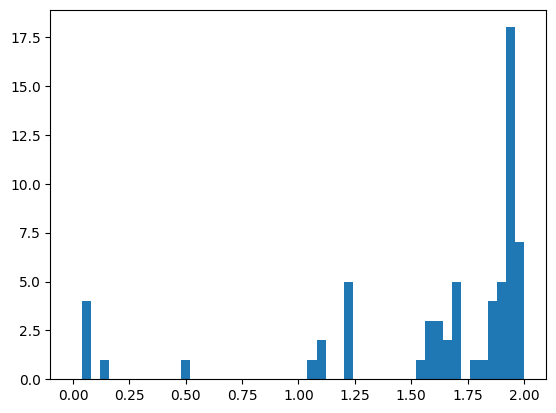

In [224]:
plt.hist(newEPRds,range=(0,2),bins=50)

### Create error arrays and variables for FinalEPRds, SweepRatios

In [225]:
len(Hsorted_dates2)

240

In [226]:
#len(newCorrectedNMRs)

In [227]:
np.save("uncorrected.npy",H2[:-10])
np.save("uncorrectedDates.npy",Hsorted_dates2[:-10])
np.savetxt("FinalEPRdsE.txt",[[FinalEPRdsE]])
np.savetxt("FinalEPRds.txt",[FinalEPRds])
np.savetxt("ReferenceRatio.txt",[[CorrectedRatio]])
np.save("newEPRds.npy",newEPRds[:-10])
np.save("sweepRatios.npy",sweepRatios[:-10])

In [228]:
len(newEPRds)

240

In [229]:
len(sweepRatios)

240

(10.0, 60.0)

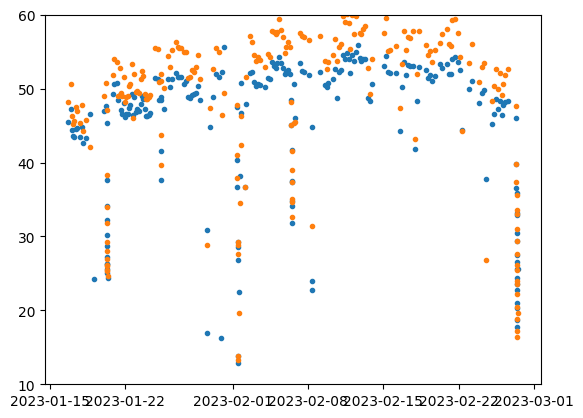

In [230]:
plt.plot(Hsorted_dates2[:-10],CorrectedNMRs[:-10],'.')
plt.plot(Hsorted_dates2[:-10],np.mean(adjDS)*H2[:-10],'.')
plt.ylim((10,60))

In [231]:
np.mean(adjDS)

1.920998994915624

In [232]:
np.save(sys.path[0]+'/../FSortedDatesCorrected.npy',Hsorted_dates2[:-10])
np.save(sys.path[0]+'/../FCorrectedDSNMR.npy',CorrectedNMRs[:-10])
np.save('FSortedDatesCorrected.npy',Hsorted_dates2[:-10])
np.save('FCorrectedDSNMR.npy',CorrectedNMRs[:-10])

In [233]:
len(Hsorted_dates2)

240

In [234]:
len(CorrectedNMRs)

240